# ROC & AUC

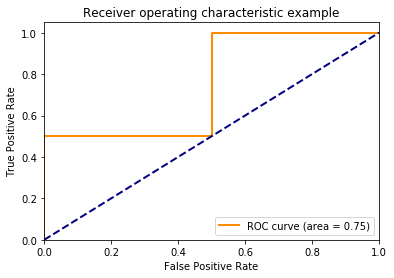

In [7]:
# 两类分类
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc,roc_auc_score
from scipy import interp

label=np.array([0,0,1,1])
score=np.array([0.1,0.4,0.35,0.8])

fpr,tpr,thresholds=roc_curve(label,score)
auc_=roc_auc_score(label,score)
# _auc=auc(fpr,tpr)
# print(_auc)
# print('false positive rate: {}'.format(fpr))
# print('true positive rate: {}'.format(tpr))
# print('thresholds: {}'.format(thresholds))
# print('area under the curve: {}'.format(auc))


plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

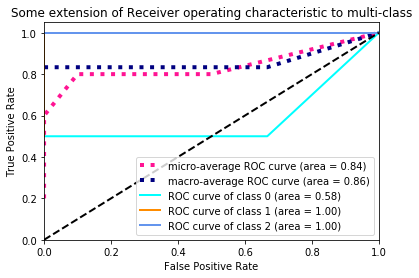

In [2]:
# 多类分类
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc,roc_auc_score
from scipy import interp

n_classes=3
y_test=np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0]])
y_score=np.array([[0.5,0.2,0.1],[0.1,0.3,0.1],[0.2,0.1,0.8],[0.1,0.2,0.3],[0.2,0.5,0.1]])


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds=dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i]= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# print(y_test[:,0])
# print(y_score[:,0])
# print(fpr[0])
# print(tpr[0])
# print(thresholds[0])
# print(roc_auc[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# SVM

In [8]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(gamma='auto', decision_function_shape='ovo')
clf.fit(X, Y) 


dec = clf.decision_function([[1]])
# dec.shape[1] # 4 classes: 4*3/2 = 6
print(dec)

clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes
print(dec)

[[-0.63212056  0.          0.3495638   0.63212056  0.98168436  0.3495638 ]]
[[ 1.9370957   3.5         0.9370957  -0.37419139]]


# Test

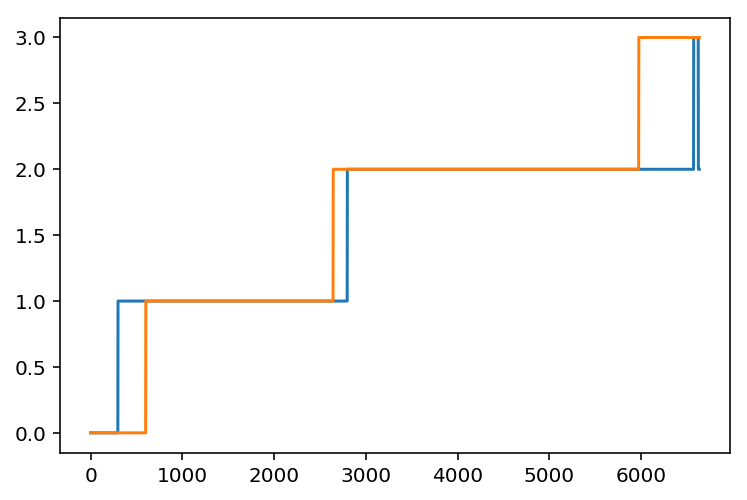

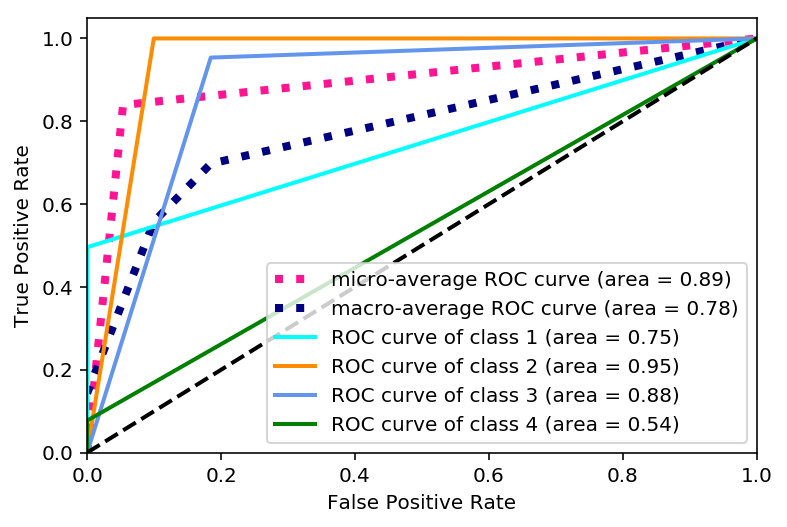

In [100]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

# # proposed
# predict=loadmat('/Users/xieliang/Documents/temp/figure/data/yproposed.mat')['y'][0][:6634]-1
# label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_proposed.mat')['y_'][0]-1
# # PCAKNN
# predict=loadmat('/Users/xieliang/Documents/temp/figure/data/yPCAKNN.mat')['y'][0][:6634]-1
# label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_PCAKNN.mat')['y_'][0]-1
# # PCASVM
# predict=loadmat('/Users/xieliang/Documents/temp/figure/data/yPCASVM.mat')['y'][0][:6634]-1
# label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_PCASVM.mat')['y_'][0]-1
# # SVMGA
# predict=loadmat('/Users/xieliang/Documents/temp/figure/data/ySVMGA.mat')['y'][0][:6634]-1
# label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_SVMGA.mat')['y_'][0]-1
# # KNNGA
# predict=loadmat('/Users/xieliang/Documents/temp/figure/data/yknnGA.mat')['y'][0][:6634]-1
# label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_knnGA.mat')['y_'][0]-1
# PCAMLP
predict=loadmat('/Users/xieliang/Documents/temp/figure/data/yPCAMLP.mat')['y'][0][:6634]-1
label=loadmat('/Users/xieliang/Documents/temp/figure/data/y_PCAMLP.mat')['y_'][0]-1
plt.figure()
plt.plot(predict)
plt.plot(label)
plt.show()

# print(predict.shape)
# print(label.shape)

n_classes=4
y_score=np.eye(4)[predict]
y_test=np.eye(4)[label]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds=dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i]= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# print(y_test[:,0])
# print(y_score[:,0])
# print(fpr[0])
# print(tpr[0])
# print(thresholds[0])
# print(roc_auc[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [10]:
import numpy as np
np.random.seed(1)
# l=np.array([1,2,3])
# l_one_hot=np.eye(4)[l]
# m=np.random.random(size=l_one_hot.shape)-0.5+l_one_hot
# print(m)
# m[1:2,[1,2]]=m[1:2,[2,1]]
# print(m)
# print(np.argmax(m,axis=1))




# KPCANN
y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
y_test=np.eye(4)[y]
y_score=np.random.random(size=y_test.shape)-0.5+y_test
y_score[177:183,[1,2]]=y_score[177:183,[2,1]]
y_score[321:331,[1,2]]=y_score[321:331,[2,1]]
print(y_score)
print(np.argmax(y_score,axis=1))



[[ 0.917022    0.22032449 -0.49988563 -0.19766743]
 [ 0.64675589 -0.40766141 -0.31373979 -0.15443927]
 [ 0.89676747  0.03881673 -0.08080549  0.1852195 ]
 ..., 
 [-0.20530796 -0.2303453   0.09054652  0.88053408]
 [ 0.20252303 -0.00387605  0.13320927  0.85339435]
 [-0.21295605 -0.36679289  0.43708038  1.30483585]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 3
 3 3 3 3 3 